In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Data import ExperimentData, AntData
from os import sep as sep
import matplotlib.animation as manimation

In [2]:
expnum = '23'
exp_path = r"Y:\Lior&Einav\Experiments\experiment23_271020"
crop_data = pd.read_csv(exp_path + sep + r"clean_crops_transparency_corrected.csv",header=[0,1])
conversion_factors = pd.read_csv(exp_path + sep + r"conversion_factors_by_weight_and_feeding_sum.csv")

In [3]:
crop_data.head()

Unnamed: 0_level_0 1069         113          12          13                \
  Unnamed: 0_level_1  red yellow  red yellow  red yellow  red        yellow   
0                  0  0.0    0.0  0.0    0.0  0.0    0.0  0.0      0.000000   
1                  1  0.0    0.0  0.0    0.0  0.0    0.0  0.0   3316.694322   
2                  2  0.0    0.0  0.0    0.0  0.0    0.0  0.0   6633.388644   
3                  3  0.0    0.0  0.0    0.0  0.0    0.0  0.0   9950.082967   
4                  4  0.0    0.0  0.0    0.0  0.0    0.0  0.0  13266.777289   

            137  ...  521                 56           1        1125  \
            red  ...  red        yellow  red yellow  red yellow  red   
0      0.000000  ...  0.0      0.000000  0.0    0.0  0.0    0.0  0.0   
1   4509.631348  ...  0.0   3329.271049  0.0    0.0  0.0    0.0  0.0   
2   9019.262695  ...  0.0   6658.542099  0.0    0.0  0.0    0.0  0.0   
3  13528.894043  ...  0.0   9987.813148  0.0    0.0  0.0    0.0  0.0   
4  18038.525391  ...  0.0  13317.084198  0.0    0.0  0.0    0.0  0.0   

                 265         
         yellow  red yellow  
0      0.000000  0.0    0.0  
1   4654.618869  0.0    0.0  
2   9309.237739  0.0    0.0  
3  13963.856608  0.0    0.0  
4  18618.475477  0.0    0.0  

[5 rows x 89 columns]

In [4]:
conversion_factors

,red,yellow
0,62357.641492,41986.362436


In [5]:
crop_data_dict = {}
for color in ['red','yellow']:
    crop_data_dict[color] = crop_data.xs(color, axis=1, level=1, drop_level=False)/conversion_factors[color][0]

In [6]:
ants = crop_data_dict['red'].columns.droplevel(1).to_list()

In [7]:
def get_yellow_fraction(crop_data_dict,ant):
    y = crop_data_dict['yellow'][ant].values
    r = crop_data_dict['red'][ant].values
    return y/(y+r)

In [8]:
yellow_fractions = pd.DataFrame(columns=ants)
for ant in ants:
    yellow_fractions[ant] = get_yellow_fraction(crop_data_dict,ant).flatten()
    

C:\Users\liorba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
yellow_fractions

In [ ]:
# FFMpegWriter = manimation.writers['ffmpeg']
# writer = FFMpegWriter()

# # Initialize the movie
# fig = plt.figure()

# # plot the sine wave line
# h = frame_data.plot.hist(density=True,xlim=[0,1])
# plt.xlabel('Fraction of Atto-labeled food')
# plt.ylabel('PDF')

# # Update the frames for the movie
# with writer.saving(fig, "histogram_animation_exp11_test.mp4", 100):
#     for ii,frame_data in yellow_fractions.iterrows():
#         if not ii % 10:
#             frame_data.plot.hist(density=True,xlim=[0,1],title="frame "+str(ii))
#             writer.grab_frame()

In [ ]:
# for ii,frame_data in yellow_fractions.iterrows():
#     if not ii % 10:
#         h = frame_data.plot.hist(density=True,xlim=[0,1])

In [ ]:

n, _ = np.histogram(yellow_fractions.iloc[9855],range=(0,1),density=True)

In [ ]:
np.linspace(0,1,11)

In [9]:
n, _ = np.histogram(yellow_fractions.iloc[9855],np.linspace(0,1,11),density=True)
n

array([1.66666667, 1.42857143, 2.14285714, 3.33333333, 1.19047619,
       0.23809524, 0.        , 0.        , 0.        , 0.        ])

In [10]:
HIST_BINS = np.linspace(0,1,11)
first_frame_with_food_red = np.nonzero(crop_data_dict['red'].sum(axis=1).values)[0][0]
first_frame_with_food_yellow = np.nonzero(crop_data_dict['yellow'].sum(axis=1).values)[0][0]
first_frame_with_food = min(first_frame_with_food_red,first_frame_with_food_yellow)
data_0 = yellow_fractions.iloc[0]

In [11]:
def prepare_animation(bar_container):
    
    def animate(frame_number):
        data = yellow_fractions.iloc[frame_number]
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container):
            rect.set_height(count)
        ax.set_title('frame '+str(frame_number))
        return bar_container
    
    return animate

<IPython.core.display.Javascript object>


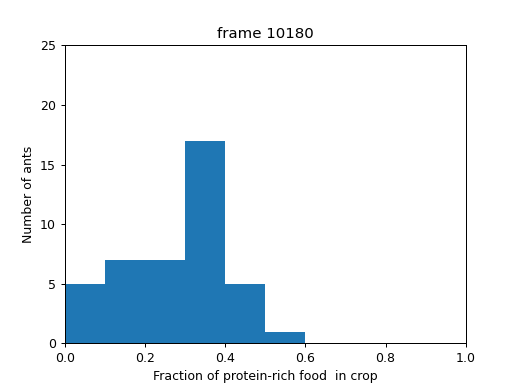

C:\Users\liorba\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\liorba\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


In [12]:
%matplotlib notebook
%matplotlib notebook
fig, ax = plt.subplots()
ax.set_xlim([0,1])
ax.set_ylim([0,25])
ax.set_xlabel('Fraction of protein-rich food  in crop')
ax.set_ylabel('Number of ants')
_, _, bar_container = ax.hist(data_0, HIST_BINS)

#frames = np.arange(first_frame_with_food,max(yellow_fractions.index)+1)

ani = manimation.FuncAnimation(fig, prepare_animation(bar_container), np.arange(0,max(yellow_fractions.index),10), repeat=False, interval=10)

plt.show()

writervideo = manimation.FFMpegWriter()
ani.save(exp_path + sep + r"crop_composition_histogram_animation.mp4")

<IPython.core.display.Javascript object>


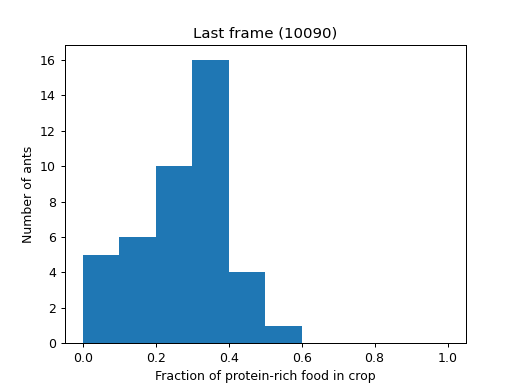

In [13]:
# final distribution
%matplotlib qt
plt.hist(yellow_fractions.iloc[-100], HIST_BINS)
plt.xlabel('Fraction of protein-rich food in crop')
plt.ylabel('Number of ants')
plt.title(f'Last frame ({str(len(yellow_fractions)-100)})')
plt.savefig(r'Y:\Lior&Einav\Experiments\plots\final_crop_distributions' + sep + 'final_crop_distribution_exp' + expnum + '.png')

In [ ]:
crop_data_dict['red'].sum(axis=1)

In [ ]:
np.nonzero(crop_data_dict['red'].sum(axis=1).values)[0][0]

In [ ]:
np.arange(4,10,2)

In [ ]:
max(yellow_fractions.index)

In [ ]:
_, _, bar_container = ax.hist(data_0, HIST_BINS)

In [ ]:
bar_container[0]

In [ ]:
10340*1.4/60/60